In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

Уберем выбросы HouseYear

In [6]:
def clean_HouseYear (df,mean_year):
    df.loc[df['HouseYear']>2019,'HouseYear'] = mean_year

Приводим в соответствие площадь и жилую прощадь и Площадь кухи

In [7]:
def prepare_Square (df):
    df.loc[(df['LifeSquare'] < 5) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85
    df.loc[df['LifeSquare']>df['Square'], 'LifeSquare']=df['Square']
    df.loc[df['KitchenSquare']>df['Square'],'KitchenSquare'] = df['Square']-df['LifeSquare']
    
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [8]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [34]:
test_data = pd.read_csv('test.csv')

In [10]:
test_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [43]:
train_data = pd.read_csv('train.csv')

In [12]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [13]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [44]:
train_data.loc[train_data['Square']>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


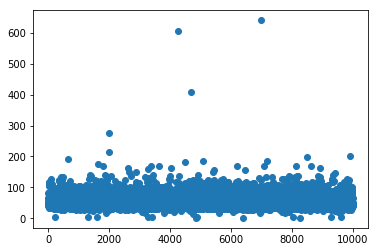

In [15]:
plt.scatter(train_data.index,train_data.Square)

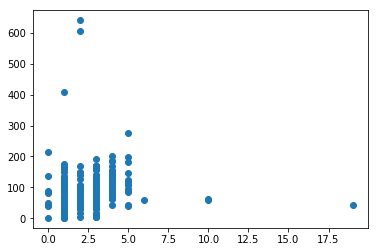

In [16]:
plt.scatter(train_data.Rooms, train_data.Square)

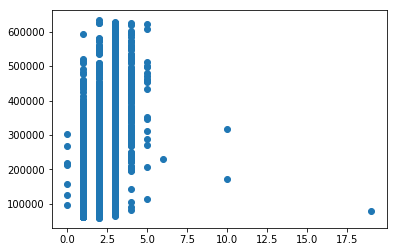

In [17]:
plt.scatter(train_data.Rooms, train_data.Price)

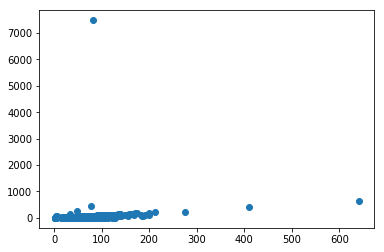

In [18]:
plt.scatter(train_data.Square, train_data.LifeSquare)

In [19]:
mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2019, 'HouseYear'].mean())
mean_healthcare = np.round(train_data["Healthcare_1"].mean())

In [20]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare):
    clean_HouseYear(df, mean_year)
    prepare_Square(df)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)

In [48]:
prepare_data(train_data)
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.8916,56.315775,40.023500,5.864350,8.526700,12.609400,1984.798900,0.118858,24.687000,5352.157400,8.039200,1142.95030,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.8236,21.058732,19.980411,5.074565,5.241148,6.775974,18.345706,0.119025,17.532614,4006.799803,23.831875,736.73424,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.0000,1.136859,0.966330,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.0000,41.774881,26.941611,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.00000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.0000,52.513310,35.992592,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1143.00000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.0000,65.900625,48.675751,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1143.00000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,10.0000,641.065193,638.163193,123.000000,42.000000,117.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [52]:
train_data = train_data.drop(train_data.loc[train_data['Square'] > 300].index)
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,8384.529359,50.401821,1.891668,56.167106,39.879305,5.864009,8.525158,12.609083,1984.793138,0.118853,24.687106,5352.169551,8.026808,1143.115135,1.319096,4.229269,214161.934244
std,4858.542606,43.588632,0.823674,19.152427,18.094166,5.074756,5.239797,6.775928,18.342448,0.119030,17.535219,4007.359551,23.798206,736.747018,1.493620,4.803361,92874.114626
min,0.000000,0.000000,1.000000,1.136859,0.966330,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4171.000000,20.000000,1.000000,41.773176,26.935417,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153893.979077
50%,8395.000000,36.000000,2.000000,52.505780,35.990152,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1143.000000,1.000000,3.000000,192302.751941
75%,12594.000000,75.000000,2.000000,65.890231,48.669093,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1143.000000,2.000000,6.000000,249174.529858
max,16798.000000,209.000000,10.000000,275.645284,233.949309,123.000000,42.000000,117.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [40]:
prepare_data(test_data)

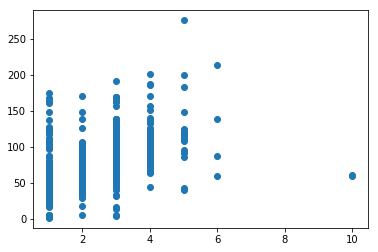

In [54]:
plt.scatter(train_data.Rooms, train_data.Square)

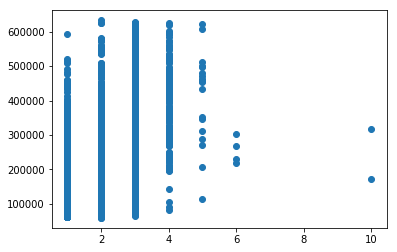

In [55]:
plt.scatter(train_data.Rooms, train_data.Price)

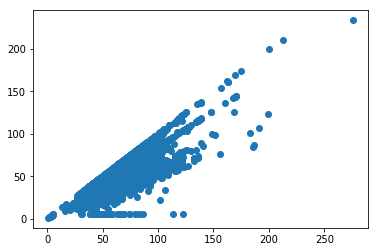

In [56]:
plt.scatter(train_data.Square, train_data.LifeSquare)

In [57]:
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 21 columns):
DistrictId       9997 non-null int64
Rooms            9997 non-null float64
Square           9997 non-null float64
LifeSquare       9997 non-null float64
KitchenSquare    9997 non-null float64
Floor            9997 non-null int64
HouseFloor       9997 non-null float64
HouseYear        9997 non-null float64
Ecology_1        9997 non-null float64
Social_1         9997 non-null int64
Social_2         9997 non-null int64
Social_3         9997 non-null int64
Healthcare_1     9997 non-null float64
Helthcare_2      9997 non-null int64
Shops_1          9997 non-null int64
Ecology_2_A      9997 non-null uint8
Ecology_2_B      9997 non-null uint8
Ecology_3_A      9997 non-null uint8
Ecology_3_B      9997 non-null uint8
Shops_2_A        9997 non-null uint8
Shops_2_B        9997 non-null uint8
dtypes: float64(8), int64(7), uint8(6)
memory usage: 1.3 MB


In [58]:
y = train_data.Price
y.count()

9997

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
r2_score_train = []
r2_score_valid = []

for val in np.arange(2,20):
    model = RandomForestRegressor(n_estimators=1000, max_depth=val, random_state=42, max_features=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    a = r2_score(y_train, y_pred_train)
    b = r2_score(y_valid, y_pred)
    r2_score_train.append(a)
    r2_score_valid.append(b)
    print(a, b)

0.48489775245568734 0.46459945729000984
0.5632496403206688 0.5397794745207289
0.6173527527045228 0.5852393374960154
0.6671098294622062 0.6246192420937431
0.7136527082897266 0.6565534732357028
0.7538915848413641 0.6809682239625345
0.7904079880188223 0.698360673349544
0.8230597846221814 0.7100079061415634
0.8518484878569745 0.7183540173393499
0.8762588677193122 0.7233273019882189
0.897304482493285 0.7279419965716579
0.9147522004359776 0.7291853246480586
0.9291587279464124 0.7309589057792584
0.9392998352417432 0.7310876670830289
0.9474894115014443 0.7322038972487975
0.9531652264317779 0.7324218658118707
0.957366427634106 0.7323084938535114
0.9600105813800247 0.7311672509875469


In [ ]:
r2_score_train

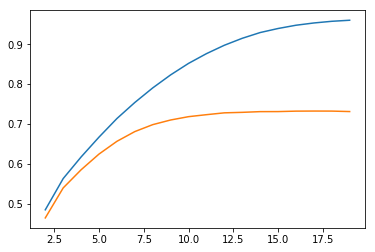

In [69]:
plt.plot(np.arange(2,20),r2_score_train)
plt.plot(np.arange(2,20),r2_score_valid)


In [72]:
model = RandomForestRegressor(n_estimators=1000, max_depth=17, random_state=42, max_features=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
r2_score(y_train, y_pred_train)
r2_score(y_valid, y_pred)
    

0.7324218658118707

In [73]:
model.feature_importances_

array([0.05005416, 0.12256124, 0.26740991, 0.09156024, 0.04178707,
       0.02711407, 0.02777704, 0.03791967, 0.03820821, 0.07754158,
       0.08296669, 0.06216888, 0.02592906, 0.01803117, 0.0249638 ,
       0.00041791, 0.00035836, 0.00062655, 0.00063167, 0.00096296,
       0.00100973])

In [74]:
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)

In [75]:
test_data.loc[:, ['Id', 'Price']].to_csv('ASenashev_kaggle_predictions.csv', index=False)